# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Concrete Compressive Strength Data Set (http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Concrete compressive strength(MPa, megapascals" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [57]:
# Importando as bibliotecas necessárias para importação dos datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [59]:
# importando os dados  

In [5]:
df=pd.read_csv('Concrete_Data.csv')

In [6]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
y=df['Concrete compressive strength(MPa, megapascals) ']

In [16]:
X=df.drop('Concrete compressive strength(MPa, megapascals) ' ,axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)

In [18]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
875,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
660,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90
606,236.0,0.0,0.0,194.0,0.0,968.0,885.0,14
233,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,100
692,212.0,141.3,0.0,203.5,0.0,973.4,750.0,90
...,...,...,...,...,...,...,...,...
313,295.7,0.0,95.6,171.5,8.9,955.1,859.2,100
834,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28
419,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,14
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28


In [19]:
y_train

603     36.45
1012    61.24
335     38.77
670     43.38
370     26.05
        ...  
510     39.00
252     38.33
88      35.30
892     32.24
727     17.44
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64

In [20]:
y_test

875    18.28
660    31.02
606    12.84
233    53.90
692    39.70
       ...  
313    52.04
834    33.69
419    16.88
571    39.70
186    24.89
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [68]:
#importando bibliotecas para construção da rede neural 

In [21]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

2023-04-21 17:18:19.189207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 17:18:19.834487: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-21 17:18:19.838896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-21 17:18:19.838913: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [70]:
#construimos a rede neural

In [159]:
n_input = 8  # numero de entradas das rede neural 
p_dropout = 0.006 # probabilidade dropout 
lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3)

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_54 (Dropout)        (None, 8)                 0         
                                                                 
 dense_54 (Dense)            (None, 100)               900       
                                                                 
 dropout_55 (Dropout)        (None, 100)               0         
                                                                 
 dense_55 (Dense)            (None, 100)               10100     
                                                                 
 dropout_56 (Dropout)        (None, 100)               0         
                                                                 
 dense_56 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-tra

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [160]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [173]:
epochs = 3000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 10,
            epochs=epochs,
            verbose=0)

In [168]:
#Avaliamos a performabnce do modelo usaremos o MAE ( mean absolute error)

In [174]:
from sklearn import metrics

y_hat_train = model.predict(X_train)
metrics.mean_absolute_error(y_train, y_hat_train)

23/23 [==============================] - 0s 541us/step


3.631204472725666

In [175]:
y_hat_test = model.predict(X_test)
metrics.mean_absolute_error(y_test, y_hat_test)

10/10 [==============================] - 0s 775us/step


4.611824471310119

In [176]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [177]:
MAE_t,R2_t,RMSE_t

(4.611824471310119, 0.839419219661379, 38.69867890509026)

In [178]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores de calcio real e predito no conjunto de teste 

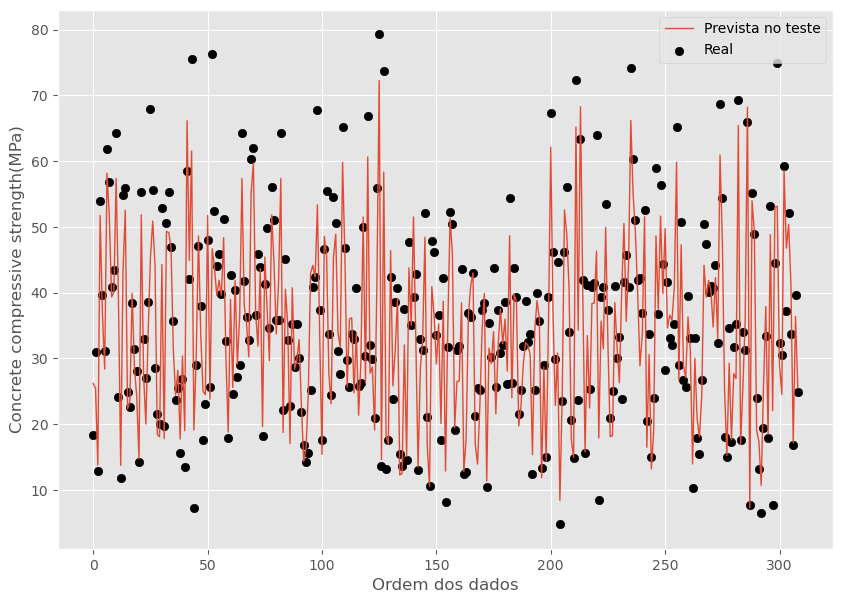

In [179]:
# avaliação conjunto de teste
n = 309
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [180]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [181]:
y_hat_mc.shape

(309, 1000)

In [182]:
#Computamos média e variância para cada ponto no set de teste.

In [183]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [184]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

4.370792302992737

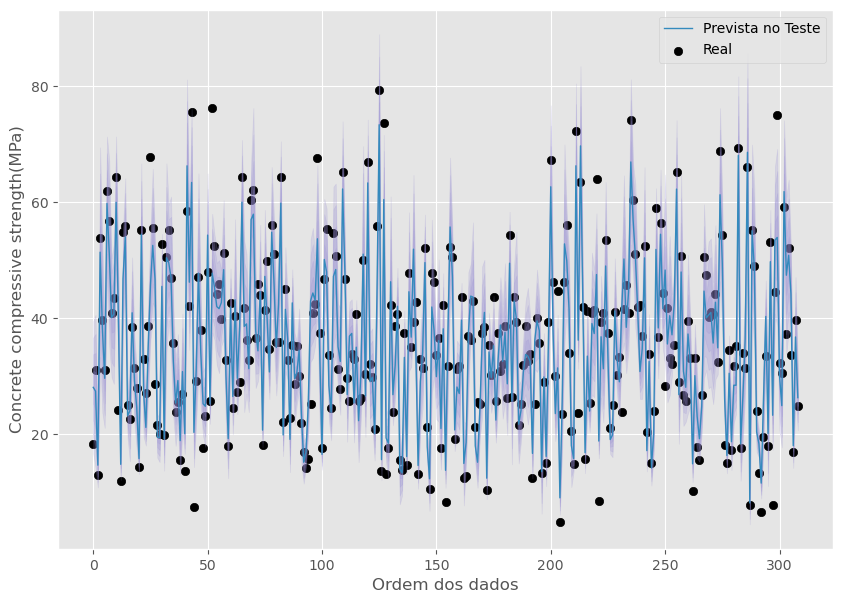

In [185]:
n = 309
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [89]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [90]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

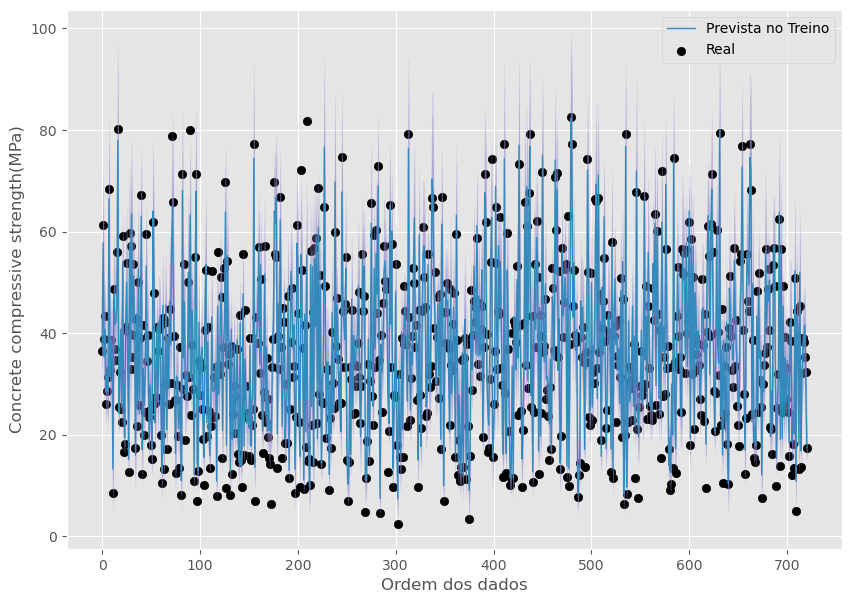

In [95]:
n = 721
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()